In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Ignore warnings for clean output
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of ai/Final_Portfolio/Housing Prices Regression/real_estate_dataset.csv")
print("Dataset Loaded Successfully")


Dataset Loaded Successfully


In [9]:
# Display first few rows
print(df.head())

   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996

In [10]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB
None


In [11]:
# Display basic statistics
print(df.describe())

               ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  \
count  500.000000   500.000000    500.000000     500.000000  500.000000   
mean   250.500000   174.640428      2.958000       1.976000    1.964000   
std    144.481833    74.672102      1.440968       0.820225    0.802491   
min      1.000000    51.265396      1.000000       1.000000    1.000000   
25%    125.750000   110.319923      2.000000       1.000000    1.000000   
50%    250.500000   178.290937      3.000000       2.000000    2.000000   
75%    375.250000   239.031220      4.000000       3.000000    3.000000   
max    500.000000   298.241199      5.000000       3.000000    3.000000   

        Year_Built  Has_Garden    Has_Pool  Garage_Size  Location_Score  \
count   500.000000  500.000000  500.000000   500.000000      500.000000   
mean   1957.604000    0.536000    0.492000    30.174000        5.164410   
std      35.491781    0.499202    0.500437    11.582575        2.853489   
min    1900.000000    0.

In [12]:
# Check for missing values
print("Missing Values:\n", df.isna().sum())

Missing Values:
 ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


In [13]:
# Display column names
print("Columns:\n", df.columns)

Columns:
 Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')


In [14]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index([], dtype='object')


In [15]:
# Convert categorical columns to numerical
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [16]:
# Define features and target
target_column = 'Price'  # Adjust this if needed
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


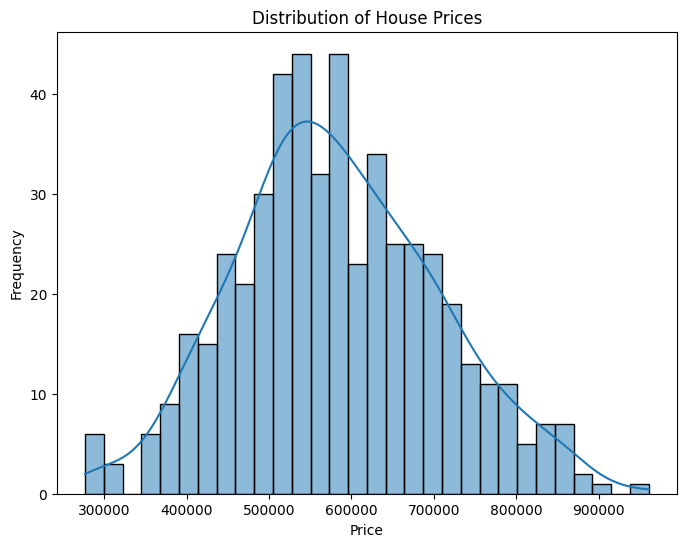

In [37]:
# Exploratory Data Analysis (EDA)
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

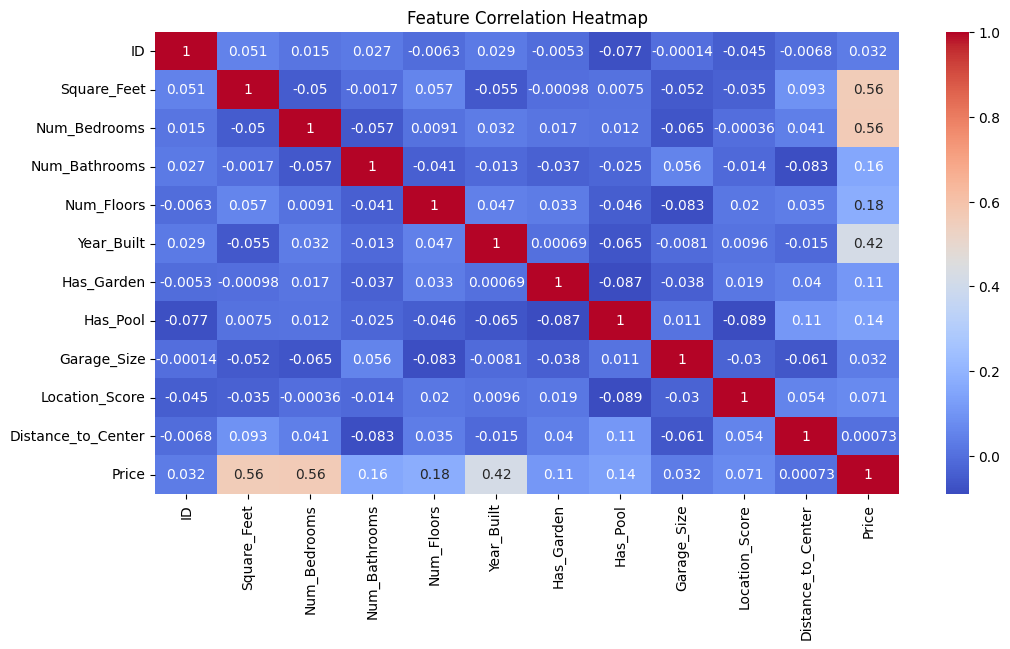

In [42]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
# Check feature names
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')


In [44]:
# Select a numeric feature for scatter plot
feature_name = df.select_dtypes(include=['number']).columns[0]

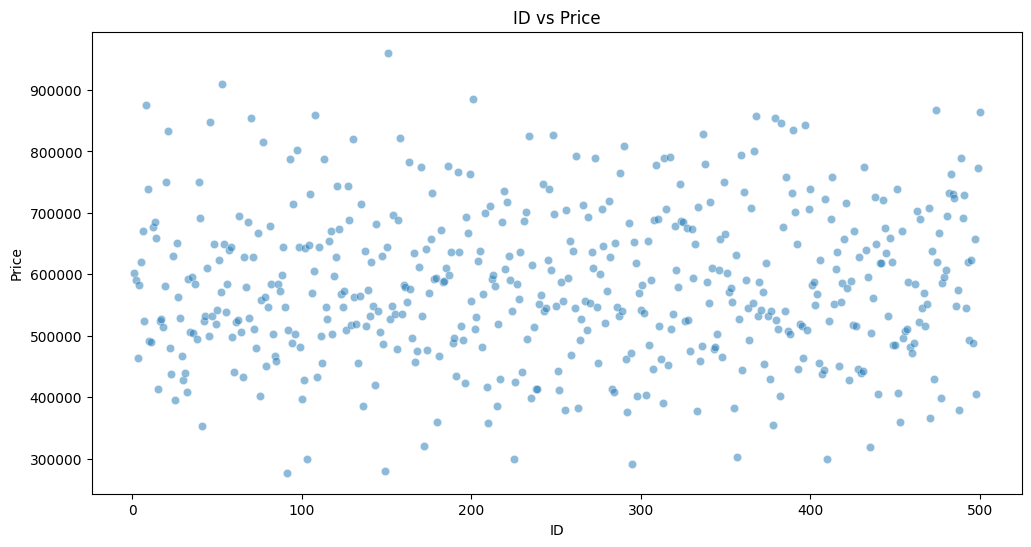

In [45]:
# Relationship between the selected feature and price
plt.figure(figsize=(12,6))
sns.scatterplot(x=df[feature_name], y=df['Price'], alpha=0.5)
plt.title(f"{feature_name} vs Price")
plt.xlabel(feature_name)
plt.ylabel("Price")
plt.show()

In [46]:
# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predictions
y_pred_lin_reg = lin_reg.predict(X_test)

In [48]:
# Evaluate Linear Regression Model
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lin_reg))
print("MAE:", mean_absolute_error(y_test, y_pred_lin_reg))
print("MSE:", mean_squared_error(y_test, y_pred_lin_reg))

Linear Regression R² Score: 0.970833811567679
MAE: 16900.083322544047
MSE: 438713006.7476914


In [49]:
# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
# Predictions
y_pred_dt = dt_reg.predict(X_test)

In [51]:
# Evaluate Decision Tree Model
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R² Score: 0.6210314997023785
MAE: 58961.2044956867
MSE: 5700381817.597771


In [52]:
# Train K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
# Predictions
y_pred_knn = knn_reg.predict(X_test)

In [54]:
# Evaluate KNN Model
print("KNN R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))

KNN R² Score: 0.6811847842190206
MAE: 53213.94172345041
MSE: 4795566010.853517


In [55]:
# Hyperparameter Tuning for KNN
param_grid_knn = {'n_neighbors': np.arange(1, 50, 1), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [56]:
# Best KNN Model
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}


In [57]:
# Train Best KNN Model
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=10, weights='distance')

In [58]:
# Predictions
y_pred_best_knn = best_knn.predict(X_test)

In [59]:
# Final Evaluation
print("Best KNN R² Score:", r2_score(y_test, y_pred_best_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_best_knn))
print("MSE:", mean_squared_error(y_test, y_pred_best_knn))

Best KNN R² Score: 0.7128275529357038
MAE: 50901.39180882005
MSE: 4319600691.0198765


In [60]:
# Conclusion
print("Final Model Selected: KNN with Hyperparameter Tuning")

Final Model Selected: KNN with Hyperparameter Tuning
